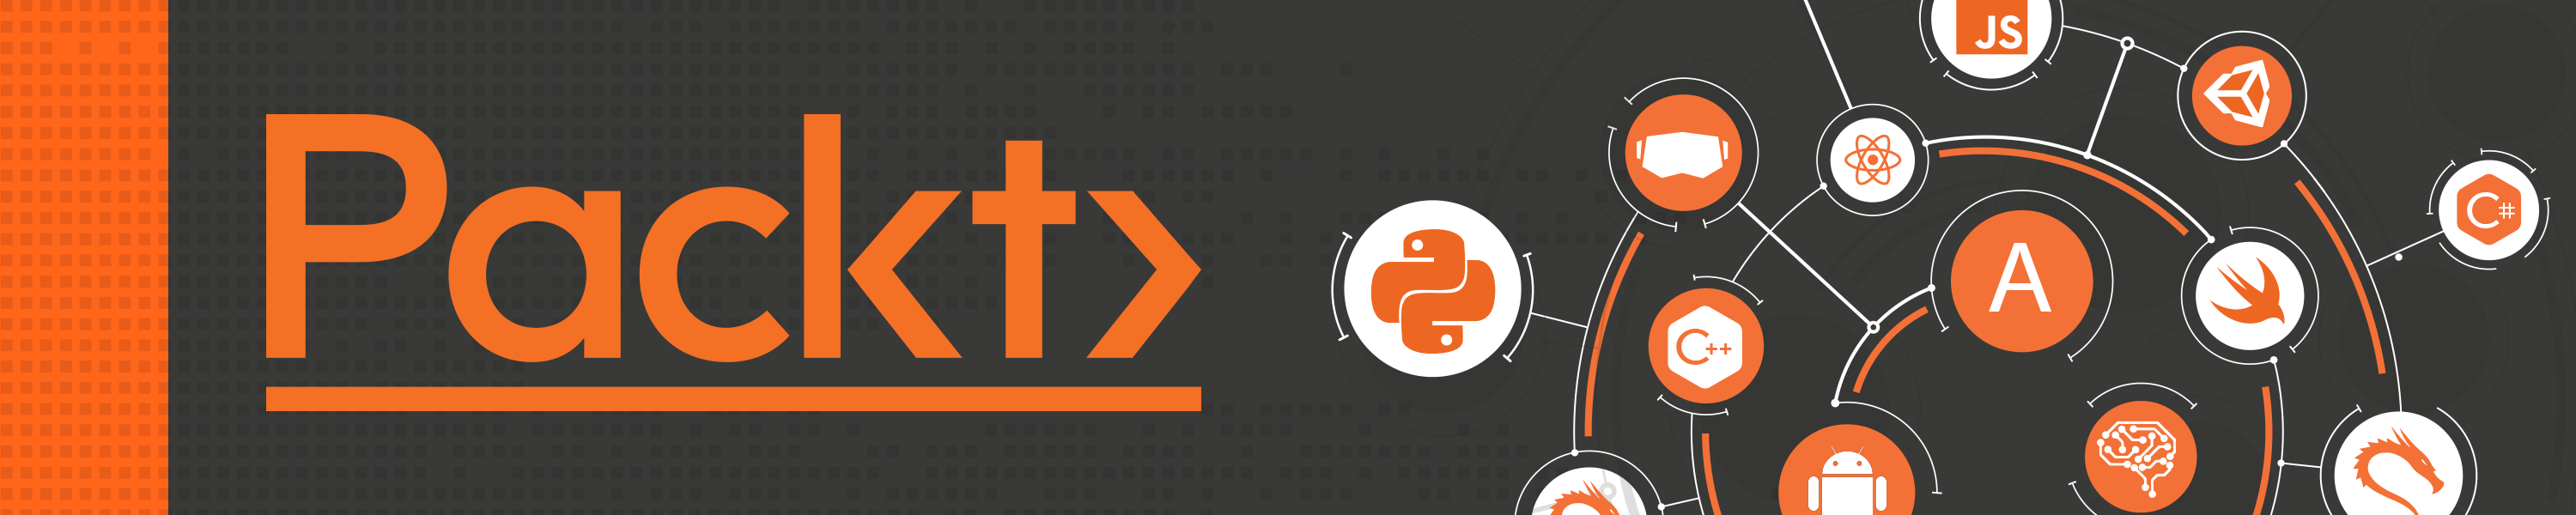

# About Me

**Name:** Raj Ghadi

**College:** B.Tech | K J Somaiya Institute of Engineering and Information Technology, Sion

**Address:** Powai, Mumbai, Maharashtra

**Contact:** 8928669402 

**E-Mail:** r.ghadi@somaiya.edu


# **Part 1: Dataset Based Questions:**

In [1]:
#import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Import both the dataset using pandas 
df1=pd.read_csv("/content/online_retail_II.csv")
df2=pd.read_csv("/content/online_retail_II2.csv")

**Data Analysis and pre-processing**

In [3]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [4]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [5]:
print("No fo Rows and Columns of Dataset 1 :",df1.shape)
print("No fo Rows and Columns of Dataset 2 :",df2.shape)

No fo Rows and Columns of Dataset 1 : (446836, 8)
No fo Rows and Columns of Dataset 2 : (461430, 8)


In [6]:
#concat both the dataset
df=pd.concat([df1,df2])
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,01/12/2009 07:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
461425,575941,22465,HANGING METAL STAR LANTERN,2.0,13/11/2011 11:39,1.65,16438.0,United Kingdom
461426,575941,17191A,ROSE FLOWER CANDLE+INCENSE 16X16CM,2.0,13/11/2011 11:39,3.75,16438.0,United Kingdom
461427,575941,85231B,CINAMMON SET OF 9 T-LIGHTS,4.0,13/11/2011 11:39,0.85,16438.0,United Kingdom
461428,575941,22807,SET OF 6 T-LIGHTS TOADSTOOLS,3.0,13/11/2011 11:39,2.95,16438.0,United Kingdom


In [7]:
print("No fo Rows and Columns of Final Dataset :",df.shape)

No fo Rows and Columns of Final Dataset : (908266, 8)


In [8]:
#Let's Check datatypes and non-null count information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908266 entries, 0 to 461429
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      908266 non-null  object 
 1   StockCode    908266 non-null  object 
 2   Description  904141 non-null  object 
 3   Quantity     908264 non-null  float64
 4   InvoiceDate  908264 non-null  object 
 5   Price        908264 non-null  float64
 6   Customer ID  706184 non-null  float64
 7   Country      908264 non-null  object 
dtypes: float64(3), object(5)
memory usage: 62.4+ MB


In [9]:
#check column wise null values total 
df.isnull().sum()

Invoice             0
StockCode           0
Description      4125
Quantity            2
InvoiceDate         2
Price               2
Customer ID    202082
Country             2
dtype: int64

In [10]:
#We have sufficiant amount of data, so we can Drop all the null values
df.dropna(inplace=True)

In [11]:
#InvoiceDate column having Object Datatype so we need to convert it into datetime datatype 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-01-12 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-01-12 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-01-12 07:45:00,1.25,13085.0,United Kingdom


In [13]:
df.shape

(706184, 8)

# Find out which customers placed the most and fewest orders.

In [14]:
df['Customer ID'].value_counts().head(1)

17841.0    11144
Name: Customer ID, dtype: int64

In [15]:
df.groupby([ df["Customer ID"],df['Country']])['Customer ID'].count().sort_values(ascending=False).head(1)

Customer ID  Country       
17841.0      United Kingdom    11144
Name: Customer ID, dtype: int64

**Customer ID "17841" from United Kindom has placed most Orders no of Orders which is 13097.**

In [16]:
df['Customer ID'].value_counts().tail()

13841.0    1
18023.0    1
17008.0    1
17310.0    1
13215.0    1
Name: Customer ID, dtype: int64

In [17]:
df['Customer ID'].value_counts()[df['Customer ID'].value_counts() == 1].sum()

153

**There are  146 customers who placed  fewest no of orders which is 1**

# Find out which country has the customers who spent the most money on one item.

In [18]:
df[["Price",	"Customer ID",	"Country","Quantity"]].sort_values(by="Price",ascending=False).head(1)

,Price,Customer ID,Country,Quantity
222681,38970.0,15098.0,United Kingdom,-1.0


**Customer from United Kingdom had spent most money on one item**

# Find out which month had the most orders.

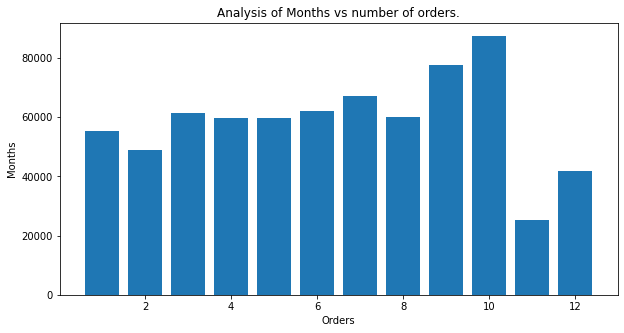

In [19]:
m1=pd.DataFrame(df.groupby([df.InvoiceDate.dt.month])['StockCode'].count())
plt.figure(figsize=(10,5))
plt.title("Analysis of Months vs number of orders.")
plt.xlabel("Orders")
plt.ylabel("Months")
plt.bar(m1.index,m1.StockCode)
plt.show()

In [20]:
pd.DataFrame(df.groupby([ df.InvoiceDate.dt.month])['StockCode'].count().rename_axis(["Month wise Total Price"]).sort_values(ascending=False))

,StockCode
Month wise Total Price,
10,87426
9,77577
7,67018
6,62164
3,61569
8,60004
5,59873
4,59679
1,55192


**In November Month had the most orders which is 106939 from year 2009 to 2011**

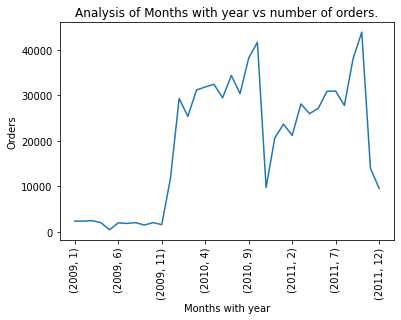

In [21]:
m2=pd.DataFrame(df.groupby([df.InvoiceDate.dt.year, df.InvoiceDate.dt.month])['StockCode'].count())
m2.plot(legend=None)
plt.title("Analysis of Months with year vs number of orders.")
plt.ylabel("Orders")
plt.xlabel("Months with year")
plt.xticks(rotation=90)
plt.show()

In [22]:
pd.DataFrame(df.groupby([df.InvoiceDate.dt.year, df.InvoiceDate.dt.month])['StockCode'].count().rename_axis(["Year","Month"]).sort_values(ascending=False))

StockCode
Year Month           
2011 10         43839
2010 10         41606
     9          38149
2011 9          37988
2010 7          34331
     5          32372
     4          31789
     3          31103
2011 7          30894
     6          30826
2010 8          30315
     6          29407
     1          29263
2011 3          28057
     8          27709
     5          27101
     4          25925
2010 2          25315
2011 1          23622
     2          21133
2010 12         20577
2011 11         13927
2009 12         11724
2010 11          9701
2011 12          9475
2009 3           2409
     1           2307
     2           2305
     10          1981
     8           1980
     4           1965
     6           1931
     7           1793
     11          1525
     9           1440
     5            400

**As per more detailed analysis, In November 2011 had most orders which is 55749 form year 2009 to 2011**

# Find out which day of the month had the most orders.

In [23]:
pd.DataFrame(df.groupby([df.InvoiceDate.dt.year, df.InvoiceDate.dt.month,df.InvoiceDate.dt.day])['StockCode'].count().rename_axis(["Year","Month","Day"]).sort_values(ascending=False))

StockCode
Year Month Day           
2011 6     11        3434
     10    11        3194
2010 4     11        3100
     7     10        2926
2011 10    30        2907
...                   ...
2009 12    22         343
2010 6     1          293
2011 6     2          279
2010 12    22         221
2011 11    13         220

[564 rows x 1 columns]

**On 12 May 2010 had the most orders.**

# Find out which day of the week had the most orders.

In [24]:
pd.DataFrame(df.groupby([df.InvoiceDate.dt.year, df.InvoiceDate.dt.month,df.InvoiceDate.dt.day,df.InvoiceDate.dt.day_name()])['StockCode'].count().rename_axis(["Year","Month","Date","Day"]).sort_values(ascending=False))

StockCode
Year Month Date Day                 
2011 6     11   Saturday        3434
     10    11   Tuesday         3194
2010 4     11   Sunday          3100
     7     10   Saturday        2926
2011 10    30   Sunday          2907
...                              ...
2009 12    22   Tuesday          343
2010 6     1    Tuesday          293
2011 6     2    Thursday         279
2010 12    22   Wednesday        221
2011 11    13   Sunday           220

[564 rows x 1 columns]

**On 12 May 2010 Wednesday had the most orders.**

# Find out which country has the customers who spent the most money on a product.

In [25]:
pd.DataFrame(df.groupby([df.Country,df.StockCode])['Price'].sum().sort_values(ascending=False).map(int))

,,Price
Country,StockCode,
United Kingdom,M,310623
EIRE,M,42965
United Kingdom,22423,35650
Norway,M,35461
Singapore,M,24317
...,...,...
Denmark,16051,0
United Kingdom,17061,0
Germany,PADS,0


**Customers from United Kingdom had spent the most money on a product whose stockcode is "M"**

# Find out which country has the customers who placed the greatest number of orders.

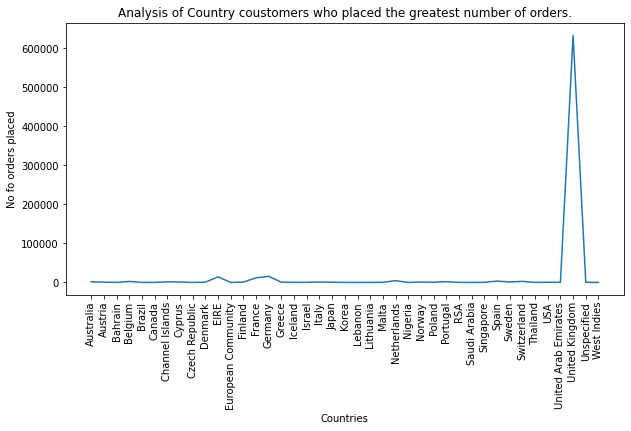

In [26]:
g2=pd.DataFrame(df.groupby([df.Country])['StockCode'].count())
plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90)
plt.title("Analysis of Country coustomers who placed the greatest number of orders.")
plt.xlabel("Countries")
plt.ylabel("No fo orders placed")
plt.plot(g2)
plt.show()

In [27]:
pd.DataFrame(df.groupby([df.Country])['StockCode'].count().rename_axis(["country"]).sort_values(ascending=False).map(int))

,StockCode
country,
United Kingdom,633429
Germany,15609
EIRE,14327
France,11913
Netherlands,4595
Spain,3507
Switzerland,2766
Belgium,2662
Portugal,2099


**Customer form United Kingdom had placed greatest no of orders**

# Find out which country had the customers who spent the greatest amount of money on orders.

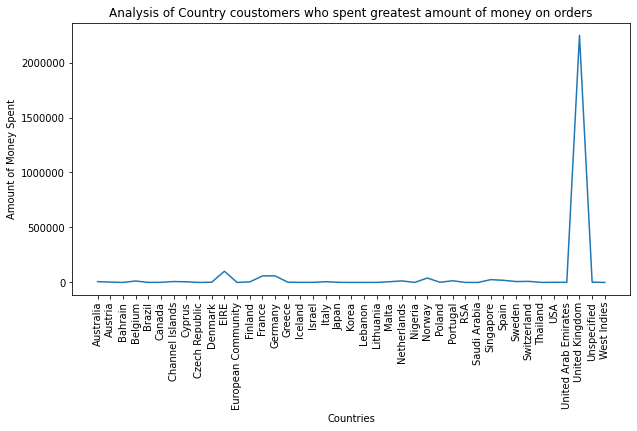

In [28]:
g1=pd.DataFrame(df.groupby([df.Country])['Price'].sum())
plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90)
plt.title("Analysis of Country coustomers who spent greatest amount of money on orders")
plt.xlabel("Countries")
plt.ylabel("Amount of Money Spent")
plt.plot(g1)
plt.show()

In [29]:
pd.DataFrame(df.groupby([df.Country])['Price'].sum().rename_axis(["country"]).sort_values(ascending=False).map(int))

,Price
country,
United Kingdom,2247083
EIRE,101822
Germany,59837
France,59440
Norway,40054
Singapore,25481
Spain,19497
Portugal,15224
Netherlands,14060


**Customers from United Kingdom spent greatest amount of money on orders**

# **Part 2: General Questions:**

# Why are you the right person for this job?

My core skills include Data Analytics, Data Science, Machine Learning, Python, web Development, and DBMS. In all of these skills, I have internship and training experience.

My Data Analytics background is a perfect fit for the job requirements. My abilities and Internship experience, in particular, make me an excellent contender for the position.

Not only will my history and skills from previous projects be useful in this role, but so will my people skills.

However, I am a self-motivated individual that strives to surpass my superior's expectations through high-quality work. Because I am a quick learner, I am able to quickly pick up business knowledge that is relevant to my project.

Finally, I'd like to mention that I work effectively both as an individual contributor and as part of a team.

All of these abilities together give me a complete package for this position.

# Do you have any previous data science experience in a real-world context?

Yes! I have Data Science experience in a real-world context.

I was a one-month intern at  The Sparks Foundation as  Data Science and Business Analyst. There I worked on two projects: the first was Iris Species Classification, and the second was Student Marks Predictor. I used my Data Analytics, Data Science, and Machine Learning skills in both projects, and created a web application for each.

 Apart from that, I'm now working on a Diseases Prediction System for my final year B.Tech project, which helps in the accurate prediction and classification of diseases such as Diabetes, Liver, Kidney, Heart, and others. In this project, we are working on technology like Machine Learning, Data Analytics, Data Science, Python Flask, and Web Development.


This are some Live Project Link:


*   [Classification of Iris Species](https://classification-iris-data.herokuapp.com/)
*   [Student marks predictor](https://student-marks-predictor-ml.herokuapp.com/)





# What kind of side projects do you enjoy working on?

I enjoy working on large, challenging projects that can create a significant impact.

But, when it comes to side projects, my primary skills are data analytics, data science, machine learning, Python, web development, and database management systems. I've worked on a few projects in the last few years that are all related to my skills. As a result, I prefer working on side projects that are related to my skills, and I am always eager to learn and explore new skills so that I may put them to good use and create useful software.

This are my some side projects :-

*  **Mobile Price predication** :  Machine Learning which helps us classify the price range of mobile phones according to mobile functionality.  [Live Project Link](https://mobile-price-classificationapp.herokuapp.com/)
*   **Inventory Management**: DBMS based project which is useful for the process of ordering, storing, using, and selling a company's inventory.  [Live Project Link](http://inventrywebsite.epizy.com/dbms.php?i=1)







# What do you consider to be your evolutionary or higher purpose in life?

I have several goals in life: Personal goals, professional goals, health goals, family goals.

They are all important to me because they are based on my top values and beliefs in life. I realized that to live purposefully, I need to be clear about my true values and beliefs. My goals are based on those values and beliefs, and each day I do something small toward achieving success with my life goals. Once I achieve one, I set another! I am a goal-oriented person.

# Why do you want to work at Packt?

Packt is a product-based multinational corporation as well as one of the world's most prolific and rapidly-growing technology book publishers. Its headquarters are in Birmingham, United Kingdom.

It would be a fantastic opportunity for me to work for such a reputable firm like Packt, and I am confident that this organisation would help me improve my talents and obtain more knowledge in the field. I'm a fresher, and I'm hoping to find a solid platform where I can better myself in the future. If you offer me the opportunity to work with you, I will do my best. My honesty and loyalty are proof of my commitment to our organisation. I read your company's profile and found that you value new talent and have a positive work environment.

This is why I want to work at Packt.








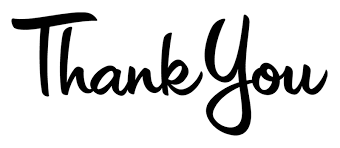